In [1]:
import numpy as np 
import pandas as pd

In [2]:
import os                         # for file locations
import matplotlib.pyplot as plt   # for plotting
import numpy as np                # arrays
import pickle                     # saving python objects
import pandas as pd               # dataframes



# colours for printing outputs
class color:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'

#  Data load

In [3]:
eeg_data=pd.read_csv('C:/Users/User/Desktop/eeg_data.csv')
eeg_data

,FP1_power_delta,FP1_power_theta,FP1_power_alpha,FP1_power_beta,FP1_power_gamma,FP2_power_delta,FP2_power_theta,FP2_power_alpha,FP2_power_beta,FP2_power_gamma,...,T5_STD_D4,T5_STD_D5,T5_STD_D6,T6_STD_D1,T6_STD_D2,T6_STD_D3,T6_STD_D4,T6_STD_D5,T6_STD_D6,epileptic_
0,15.980332,8.633358,3.092433,0.846559,0.372832,17.581626,9.937238,3.485713,0.945396,0.428797,...,31.427918,29.699413,32.013546,3.583559,12.529528,45.831132,61.890813,34.783454,33.245906,1
1,223.267803,41.573241,13.043525,6.463381,6.168712,298.274432,50.013025,14.411482,6.659230,4.942250,...,24.822720,47.185918,93.619195,14.158489,15.217886,30.927407,77.324322,153.442359,213.780950,1
2,158.673907,31.788608,9.956198,3.736977,2.926979,232.762741,39.332981,10.956081,3.478036,2.153082,...,21.708222,47.412375,85.729645,9.493639,11.824569,24.555772,59.229187,112.406306,171.618208,1
3,29.767326,3.875543,1.553127,0.438266,0.140495,45.206547,5.173542,2.028637,0.528962,0.161283,...,26.319506,39.628894,51.473202,1.872515,5.392639,17.296780,35.824586,44.892899,79.613460,1
4,33.821075,3.635210,1.347280,0.313205,0.080396,55.670043,4.925017,1.783729,0.394463,0.102254,...,26.111048,39.177537,52.925676,1.408291,4.556997,12.733549,25.676801,44.406617,94.770581,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2211,93.573012,9.060520,4.980545,4.839014,2.402408,103.479883,10.121498,5.411378,5.112091,2.410508,...,28.420439,35.838353,55.575530,13.980452,15.455901,17.599760,35.736742,44.639277,52.441626,0
2212,15.523587,3.195279,1.268068,0.788076,0.350012,15.177286,3.420879,1.324339,0.772379,0.340149,...,25.567858,29.982968,19.842641,3.896454,4.507998,9.674004,29.642064,32.178907,23.513508,0
2213,17.580684,2.208482,0.512273,0.122671,0.042173,18.294247,2.380609,0.560150,0.132999,0.045041,...,15.186601,23.281200,31.479138,1.183803,2.253192,6.133507,18.810084,29.451244,40.868567,0
2214,35.847315,3.354388,2.280252,2.368355,1.217081,33.889844,3.048972,1.356364,1.159790,0.632721,...,20.376012,23.182715,24.117538,6.995231,6.819144,9.820588,26.620415,30.167641,31.778504,0


In [4]:
eeg_data.shape

(2216, 668)

### Separate entries (features) and output (target)

In [9]:
data_y=eeg_data['epileptic_']
data_x=eeg_data.drop(columns=['epileptic_'])

In [10]:
print(color.BOLD+'Feature DataFrame'+color.END)
display(data_x.shape)
print(color.BOLD+'Target DataFrame'+color.END)
display(data_y.shape)

Feature DataFrame


(2216, 667)

Target DataFrame


(2216,)

### Plot the number of patients in each class

The number of subjects for the non epileptic class is: 1196
The number of trials for the epileptic class is: 1220


C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


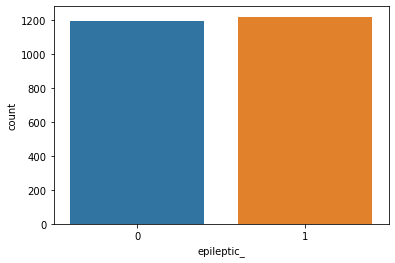

In [104]:
import seaborn as sns
cols = eeg_data.columns
tgt = eeg_data.epileptic_

ax = sns.countplot(tgt,label="Count")
non_epil, epil = tgt.value_counts()
print('The number of subjects for the non epileptic class is:', epil)
print('The number of trials for the epileptic class is:', non_epil);

### Divide the data into two sets: training and testing

In [110]:
from sklearn.model_selection import train_test_split
TEST_SIZE = 0.2
RANDOM_STATE=0
X_train, X_test, y_train, y_test = train_test_split(data_x, data_y,stratify=data_y,
                                                    test_size=TEST_SIZE, 
                                                    random_state=RANDOM_STATE)

In [111]:
def get_proportions(data):

    counts = pd.DataFrame(np.unique(data, return_counts=True), index = ['Class_ID', 'Counts']).T
    counts['Percent'] = (counts['Counts']/counts['Counts'].sum()).round(2)*100
    counts = counts.set_index('Class_ID')
    return counts

    
print(color.BOLD+color.UNDERLINE+'Training DataFrame'+color.END)
display(get_proportions(y_train))
#print(color.BOLD+color.UNDERLINE+'Validation DataFrame'+color.END)
#display(get_proportions(y_val))
print(color.BOLD+color.UNDERLINE+'\nTest DataFrame'+color.END)
display(get_proportions(y_test))

Training DataFrame


,Counts,Percent
Class_ID,,
0,956,46.0
1,1136,54.0



Test DataFrame


,Counts,Percent
Class_ID,,
0,240,46.0
1,284,54.0


### Scaling the data

In [112]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train= scaler.fit_transform(X_train)
X_test= scaler.transform(X_test)

# Dimensionality_Reduction

## 1) Feature Importances with Random Forests

In [113]:
%%time
from sklearn.ensemble import RandomForestClassifier

# create a forest classifier
forest = RandomForestClassifier(criterion='gini',
                                n_estimators=1000,
                                max_features = 'sqrt',
                                random_state=RANDOM_STATE,
                                n_jobs=-1)

# fit the classifier
forest.fit(X_train, y_train)

# get the importances for the features
importances = forest.feature_importances_

importances_series = pd.Series(importances,index=data_x.columns).sort_values(ascending = False)

Wall time: 27.3 s


### Plot the top 30 features to see how they contributed.

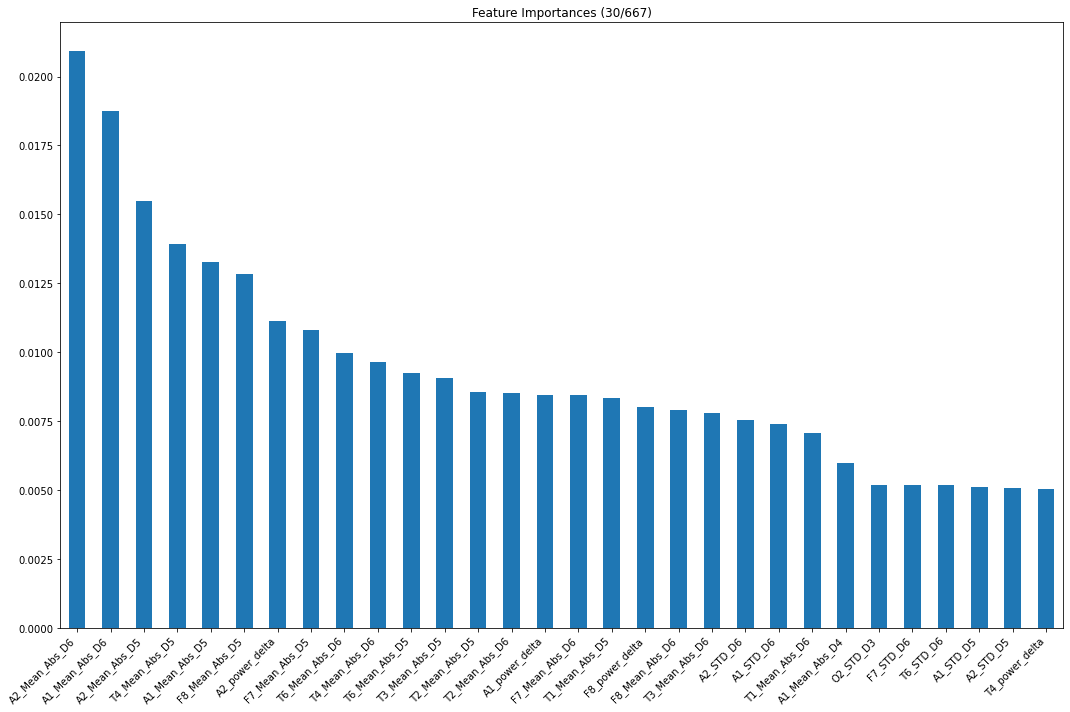

In [114]:
PLOT_LIMIT = 30

# plot the important features
plt.figure(figsize=(15,10))
importances_series[:PLOT_LIMIT].plot.bar(legend =False, grid=False)
plt.title('Feature Importances ('+str(PLOT_LIMIT)+'/'+str(len(importances_series))+')')

plt.xticks(rotation=45,ha='right')
plt.tight_layout()

plt.savefig('forest_importances.png', dpi=300)
plt.show()

In [115]:
l=[]
for s in importances_series.index:
    l.append([s[:s.find("_")],s[s.find("_")+1:]])
list_of_lists=l

In [116]:
importances_multi_index = importances_series.copy()

tuple_of_tuples = tuple(tuple(x) for x in list_of_lists)
importances_multi_index.index = pd.MultiIndex.from_tuples(tuple_of_tuples)
importances_multi_index.index.names = ['channel', 'feature']
importances_multi_index.head()

channel  feature    
A2       Mean_Abs_D6    0.020919
A1       Mean_Abs_D6    0.018744
A2       Mean_Abs_D5    0.015492
T4       Mean_Abs_D5    0.013915
A1       Mean_Abs_D5    0.013283
dtype: float64

### Plot EEG channels that are contributing the most to classification

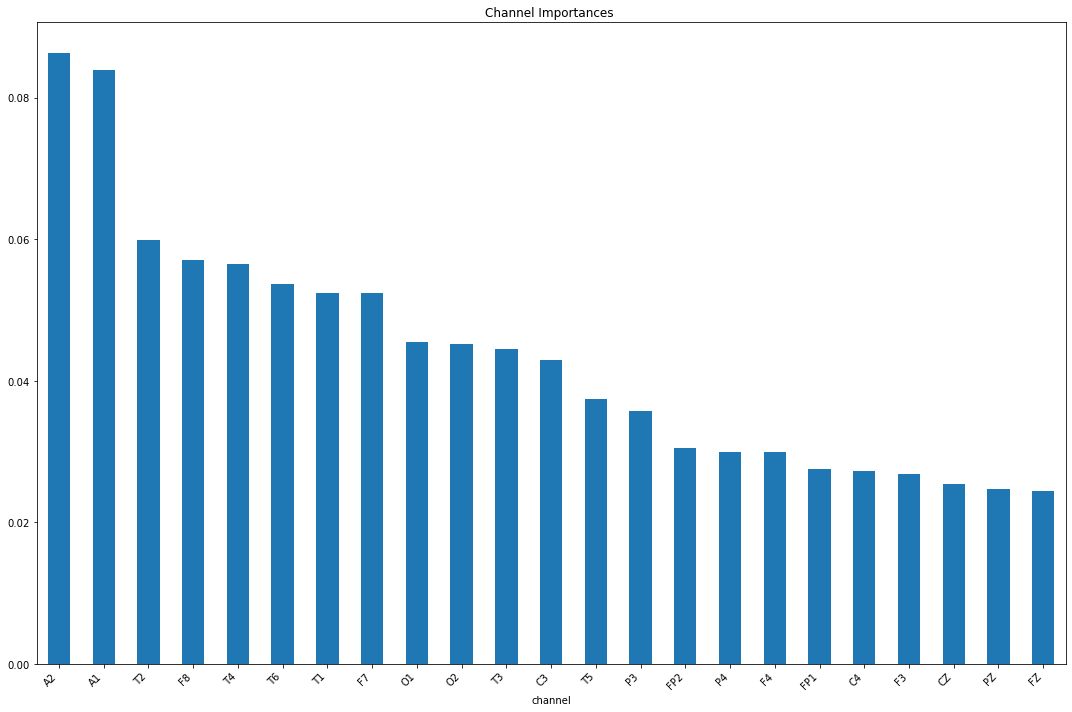

In [117]:
plt.figure(figsize=(15,10))

importances_channel = importances_multi_index.groupby('channel').sum()
importances_channel.sort_values(ascending = False).plot.bar(legend =False, grid=False)

plt.title('Channel Importances ')

plt.xticks(rotation=45,ha='right')
plt.tight_layout()

#plt.savefig(image_file_path, dpi=300)
plt.show()

#### List of the most contribued EEG channels

In [118]:
importances_channel = importances_multi_index.groupby('channel').sum()

In [119]:
channel_rest=importances_channel.sort_values(ascending = False)[:10].index
channel_rest

Index(['A2', 'A1', 'T2', 'F8', 'T4', 'T6', 'T1', 'F7', 'O1', 'O2'], dtype='object', name='channel')

#### Plot features that are contributing the most to classification

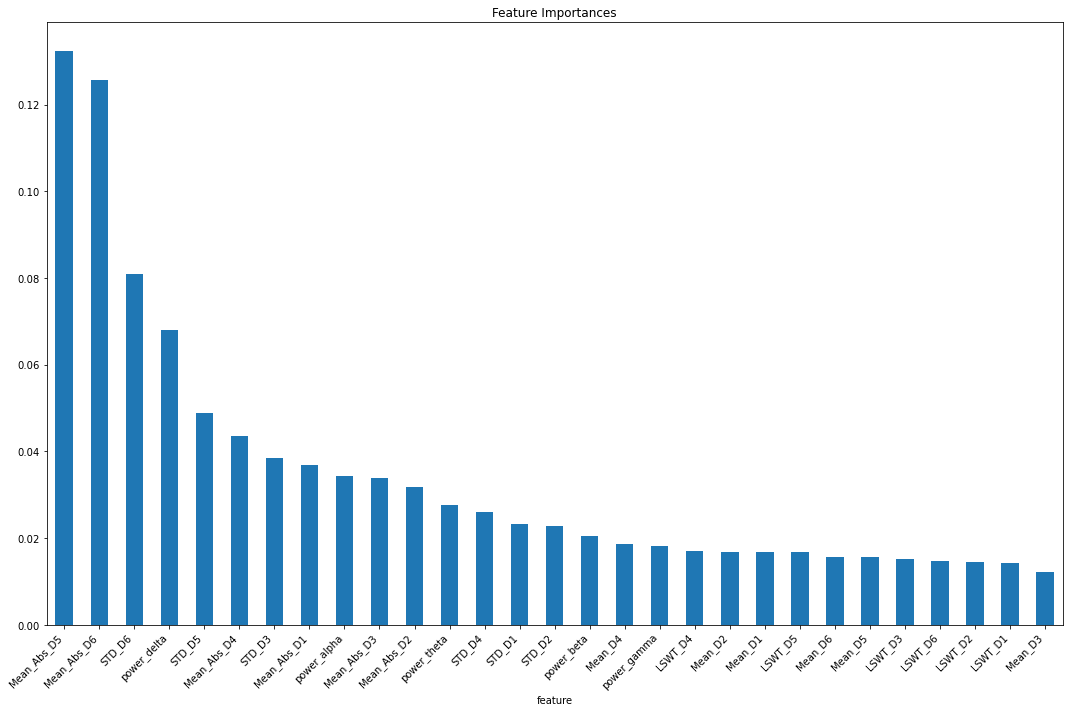

In [120]:
plt.figure(figsize=(15,10))

importances_features = importances_multi_index.groupby('feature').sum()
importances_features.sort_values(ascending = False).plot.bar(legend =False, grid=False)
plt.title('Feature Importances')

plt.xticks(rotation=45,ha='right')
plt.tight_layout()

#plt.savefig(image_file_path, dpi=300)
plt.show()

#### List of the most contribued features

In [121]:
importances_features = importances_multi_index.groupby('feature').sum()
features_rest=importances_features.sort_values(ascending = False)
features_rest

feature
Mean_Abs_D5    0.132328
Mean_Abs_D6    0.125576
STD_D6         0.080858
power_delta    0.067932
STD_D5         0.048861
Mean_Abs_D4    0.043469
STD_D3         0.038487
Mean_Abs_D1    0.036880
power_alpha    0.034281
Mean_Abs_D3    0.033914
Mean_Abs_D2    0.031709
power_theta    0.027512
STD_D4         0.026044
STD_D1         0.023192
STD_D2         0.022827
power_beta     0.020389
Mean_D4        0.018602
power_gamma    0.018138
LSWT_D4        0.016996
Mean_D2        0.016814
Mean_D1        0.016707
LSWT_D5        0.016695
Mean_D6        0.015710
Mean_D5        0.015560
LSWT_D3        0.015065
LSWT_D6        0.014693
LSWT_D2        0.014479
LSWT_D1        0.014154
Mean_D3        0.012131
dtype: float64

In [122]:
features_rest=features_rest[:10].index
features_rest

Index(['Mean_Abs_D5', 'Mean_Abs_D6', 'STD_D6', 'power_delta', 'STD_D5',
       'Mean_Abs_D4', 'STD_D3', 'Mean_Abs_D1', 'power_alpha', 'Mean_Abs_D3'],
      dtype='object', name='feature')

#### The 2 lists

In [123]:
print(channel_rest)
print(features_rest)

Index(['A2', 'A1', 'T2', 'F8', 'T4', 'T6', 'T1', 'F7', 'O1', 'O2'], dtype='object', name='channel')
Index(['Mean_Abs_D5', 'Mean_Abs_D6', 'STD_D6', 'power_delta', 'STD_D5',
       'Mean_Abs_D4', 'STD_D3', 'Mean_Abs_D1', 'power_alpha', 'Mean_Abs_D3'],
      dtype='object', name='feature')


In [11]:
l1=['A2', 'A1', 'T2', 'F8', 'T4', 'T6', 'T1', 'F7', 'O1', 'O2']
l2=['Mean_Abs_D5', 'Mean_Abs_D6', 'STD_D6', 'power_delta', 'STD_D5',
       'Mean_Abs_D4', 'STD_D3', 'Mean_Abs_D1', 'power_alpha', 'Mean_Abs_D3']


In [12]:
feat_rest=[]
for i in l1:
    for j in l2:
        feat_rest.append(i+'_'+j)

In [13]:
feat_rest

['A2_Mean_Abs_D5',
 'A2_Mean_Abs_D6',
 'A2_STD_D6',
 'A2_power_delta',
 'A2_STD_D5',
 'A2_Mean_Abs_D4',
 'A2_STD_D3',
 'A2_Mean_Abs_D1',
 'A2_power_alpha',
 'A2_Mean_Abs_D3',
 'A1_Mean_Abs_D5',
 'A1_Mean_Abs_D6',
 'A1_STD_D6',
 'A1_power_delta',
 'A1_STD_D5',
 'A1_Mean_Abs_D4',
 'A1_STD_D3',
 'A1_Mean_Abs_D1',
 'A1_power_alpha',
 'A1_Mean_Abs_D3',
 'T2_Mean_Abs_D5',
 'T2_Mean_Abs_D6',
 'T2_STD_D6',
 'T2_power_delta',
 'T2_STD_D5',
 'T2_Mean_Abs_D4',
 'T2_STD_D3',
 'T2_Mean_Abs_D1',
 'T2_power_alpha',
 'T2_Mean_Abs_D3',
 'F8_Mean_Abs_D5',
 'F8_Mean_Abs_D6',
 'F8_STD_D6',
 'F8_power_delta',
 'F8_STD_D5',
 'F8_Mean_Abs_D4',
 'F8_STD_D3',
 'F8_Mean_Abs_D1',
 'F8_power_alpha',
 'F8_Mean_Abs_D3',
 'T4_Mean_Abs_D5',
 'T4_Mean_Abs_D6',
 'T4_STD_D6',
 'T4_power_delta',
 'T4_STD_D5',
 'T4_Mean_Abs_D4',
 'T4_STD_D3',
 'T4_Mean_Abs_D1',
 'T4_power_alpha',
 'T4_Mean_Abs_D3',
 'T6_Mean_Abs_D5',
 'T6_Mean_Abs_D6',
 'T6_STD_D6',
 'T6_power_delta',
 'T6_STD_D5',
 'T6_Mean_Abs_D4',
 'T6_STD_D3',
 'T6_Me

In [14]:
data_x=data_x[feat_rest]
data_x

,A2_Mean_Abs_D5,A2_Mean_Abs_D6,A2_STD_D6,A2_power_delta,A2_STD_D5,A2_Mean_Abs_D4,A2_STD_D3,A2_Mean_Abs_D1,A2_power_alpha,A2_Mean_Abs_D3,...,O2_Mean_Abs_D5,O2_Mean_Abs_D6,O2_STD_D6,O2_power_delta,O2_STD_D5,O2_Mean_Abs_D4,O2_STD_D3,O2_Mean_Abs_D1,O2_power_alpha,O2_Mean_Abs_D3
0,22.852999,20.933965,29.964009,28.375780,30.824194,30.992704,24.633367,8.144439,9.757570,19.473985,...,21.486506,22.445046,30.553198,24.154908,28.352918,30.724501,29.826645,2.325579,12.609051,23.418029
1,86.179374,130.066353,162.276954,250.726060,108.082820,39.456946,25.925361,15.034749,12.881167,19.925797,...,84.824403,121.224358,152.171055,260.631991,107.206309,47.741488,26.912366,10.050170,13.122560,21.026767
2,82.140289,129.243781,555.038460,4278.751615,416.164959,39.935063,101.969857,9.304120,193.788307,19.501047,...,66.288761,101.123762,131.608233,207.534753,86.902613,37.472771,22.043434,6.698510,9.070267,17.087469
3,34.889976,62.474034,78.775816,67.900098,44.499732,21.792643,14.903368,1.682266,3.938097,11.377001,...,30.973314,51.038523,63.217004,45.290731,39.542323,19.835054,13.090136,1.319977,3.007469,9.602630
4,35.375126,75.996431,94.032286,95.513353,45.084992,19.552341,13.195616,1.740124,3.279134,10.126820,...,30.635071,57.370617,72.365340,57.714807,39.104117,17.387770,10.971266,1.150261,2.237019,8.286495
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2211,81.923520,99.579880,128.216258,278.915946,105.750210,67.761091,29.823383,10.673200,16.307940,23.486070,...,79.645676,97.142354,126.112230,259.105839,102.468201,65.622440,30.815601,4.224018,16.678501,24.286607
2212,56.645968,97.631636,121.279286,142.101964,72.086131,31.265896,16.908417,8.435928,5.372185,13.327179,...,73.881114,127.903927,162.003656,273.642216,95.774027,55.500747,28.137599,8.380469,13.992961,21.792593
2213,53.533686,88.152523,114.288080,133.407780,68.317539,32.920422,17.102229,7.282855,5.530731,13.367891,...,74.048495,121.607904,153.997416,255.424762,93.902365,54.103248,28.272876,6.068071,13.798390,21.966931
2214,31.958405,67.167126,85.090098,73.286069,40.522999,25.573151,15.384458,4.902508,4.058711,11.976274,...,46.610193,83.172397,105.078417,120.011487,58.275387,36.470612,21.882210,1.674490,7.690967,16.845261


In [15]:

from sklearn.model_selection import train_test_split
TEST_SIZE = 0.2
RANDOM_STATE=0
X_train, X_test, y_train, y_test = train_test_split(data_x, data_y, stratify=data_y,
                                                    test_size=TEST_SIZE, 
                                                    random_state=RANDOM_STATE)

## 2) Sequential Feature Selector

In [132]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.svm import SVC

# set the random state
np.random.seed(seed=RANDOM_STATE)


pipe_svc_linear = Pipeline([('scl', StandardScaler()),
                            ('clf', SVC(kernel='linear', 
                                        class_weight = 'balanced', 
                                        random_state=RANDOM_STATE))])

N_SPLITS = 5

StratKFold = StratifiedKFold(n_splits = N_SPLITS,
                             shuffle=False,
                             random_state=RANDOM_STATE)



In [133]:
%%time
from mlxtend.feature_selection import SequentialFeatureSelector
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs


indices=np.arange(100)
sfs = SequentialFeatureSelector(pipe_svc_linear,
                                k_features=30, 
                                forward=True, 
                                floating=False, 
                                verbose=2,
                                scoring='f1',
                                cv=StratKFold,
                                n_jobs=-1)

sfs.fit(X_train, y_train, custom_feature_names=X_train.columns[indices])
display(pd.DataFrame.from_dict(sfs.get_metric_dict()).T)
dat=pd.DataFrame.from_dict(sfs.get_metric_dict()).T


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   47.6s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  1.1min finished

[2021-04-28 01:06:37] Features: 1/30 -- score: 0.7062071243016866[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    8.7s
[Parallel(n_jobs=-1)]: Done  99 out of  99 | elapsed:   26.8s finished

[2021-04-28 01:07:04] Features: 2/30 -- score: 0.7293051435429632[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    9.9s
[Parallel(n_jobs=-1)]: Done  98 out of  98 | elapsed:   28.0s finished

[2021-04-28 01:07:32] Features: 3/30 -- score: 0.7550610250384737[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    9.8s
[Parallel(n_jobs=-1)]: Done  97 out o

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
1,"(64,)","[0.7127158555729983, 0.7070063694267517, 0.709...",0.706207,"(T1_STD_D5,)",0.00608212,0.0047321,0.00236605
2,"(64, 71)","[0.7097791798107256, 0.7710371819960861, 0.707...",0.729305,"(T1_STD_D5, F7_Mean_Abs_D6)",0.035252,0.0274272,0.0137136
3,"(64, 71, 74)","[0.7595419847328244, 0.7886178861788617, 0.752...",0.755061,"(T1_STD_D5, F7_Mean_Abs_D6, F7_STD_D5)",0.0292634,0.0227679,0.011384
4,"(64, 67, 71, 74)","[0.7716535433070866, 0.7967479674796748, 0.752...",0.759481,"(T1_STD_D5, T1_Mean_Abs_D1, F7_Mean_Abs_D6, F7...",0.031642,0.0246185,0.0123093
5,"(34, 64, 67, 71, 74)","[0.7793814432989692, 0.7959183673469388, 0.761...",0.761106,"(F8_STD_D5, T1_STD_D5, T1_Mean_Abs_D1, F7_Mean...",0.0333662,0.02596,0.01298
6,"(34, 51, 64, 67, 71, 74)","[0.7803738317757009, 0.7861507128309572, 0.758...",0.75987,"(F8_STD_D5, T6_Mean_Abs_D6, T1_STD_D5, T1_Mean...",0.0335354,0.0260917,0.0130459
7,"(22, 34, 51, 64, 67, 71, 74)","[0.7832167832167832, 0.8103448275862069, 0.761...",0.763472,"(T2_STD_D6, F8_STD_D5, T6_Mean_Abs_D6, T1_STD_...",0.0424739,0.0330461,0.0165231
8,"(22, 34, 51, 64, 67, 68, 71, 74)","[0.7832167832167832, 0.8130434782608696, 0.750...",0.76212,"(T2_STD_D6, F8_STD_D5, T6_Mean_Abs_D6, T1_STD_...",0.0439523,0.0341964,0.0170982
9,"(22, 34, 51, 63, 64, 67, 68, 71, 74)","[0.793577981651376, 0.8009049773755655, 0.7629...",0.761808,"(T2_STD_D6, F8_STD_D5, T6_Mean_Abs_D6, T1_powe...",0.0450117,0.0350207,0.0175103
10,"(22, 23, 34, 51, 63, 64, 67, 68, 71, 74)","[0.7963386727688787, 0.7872763419483102, 0.765...",0.758915,"(T2_STD_D6, T2_power_delta, F8_STD_D5, T6_Mean...",0.041637,0.032395,0.0161975


Wall time: 1h 16min 49s


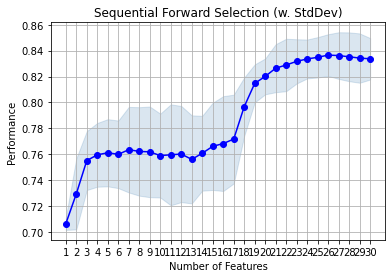

<Figure size 720x2160 with 0 Axes>

In [134]:
fig1 = plot_sfs(sfs.get_metric_dict(), kind='std_dev')
plt.title('Sequential Forward Selection (w. StdDev)')
plt.grid()
plt.figure(figsize=(10,30))

plt.show()

#### The max 'avg_score'

In [135]:
max_avg=dat['avg_score'].max()
max_avg

0.8365812680003419

In [136]:
list(dat[dat['avg_score']==max_avg]['feature_names'])

[('A1_power_delta',
  'T2_Mean_Abs_D5',
  'T2_STD_D6',
  'T2_power_delta',
  'T2_STD_D5',
  'T2_STD_D3',
  'T2_power_alpha',
  'F8_STD_D5',
  'F8_power_alpha',
  'T4_STD_D5',
  'T4_Mean_Abs_D4',
  'T6_Mean_Abs_D6',
  'T6_STD_D5',
  'T6_Mean_Abs_D1',
  'T1_Mean_Abs_D6',
  'T1_power_delta',
  'T1_STD_D5',
  'T1_STD_D3',
  'T1_Mean_Abs_D1',
  'T1_power_alpha',
  'F7_Mean_Abs_D6',
  'F7_STD_D6',
  'F7_STD_D5',
  'O1_Mean_Abs_D3',
  'O2_Mean_Abs_D5',
  'O2_STD_D3')]

In [16]:
feature_seq=['A1_power_delta',
  'T2_Mean_Abs_D5',
  'T2_STD_D6',
  'T2_power_delta',
  'T2_STD_D5',
  'T2_STD_D3',
  'T2_power_alpha',
  'F8_STD_D5',
  'F8_power_alpha',
  'T4_STD_D5',
  'T4_Mean_Abs_D4',
  'T6_Mean_Abs_D6',
  'T6_STD_D5',
  'T6_Mean_Abs_D1',
  'T1_Mean_Abs_D6',
  'T1_power_delta',
  'T1_STD_D5',
  'T1_STD_D3',
  'T1_Mean_Abs_D1',
  'T1_power_alpha',
  'F7_Mean_Abs_D6',
  'F7_STD_D6',
  'F7_STD_D5',
  'O1_Mean_Abs_D3',
  'O2_Mean_Abs_D5',
  'O2_STD_D3']

In [17]:
len(feature_seq)

26

# Final Data

In [18]:
data_x=data_x[feature_seq]
data_x

,A1_power_delta,T2_Mean_Abs_D5,T2_STD_D6,T2_power_delta,T2_STD_D5,T2_STD_D3,T2_power_alpha,F8_STD_D5,F8_power_alpha,T4_STD_D5,...,T1_STD_D5,T1_STD_D3,T1_Mean_Abs_D1,T1_power_alpha,F7_Mean_Abs_D6,F7_STD_D6,F7_STD_D5,O1_Mean_Abs_D3,O2_Mean_Abs_D5,O2_STD_D3
0,24.710986,22.231348,31.616855,27.786890,30.361658,20.604458,6.707438,30.764537,8.165282,35.114478,...,28.090832,16.978149,2.895882,4.524109,27.913027,38.195532,28.545601,17.595063,21.486506,29.826645
1,20.227762,97.072629,189.358288,333.201574,121.428051,27.602988,13.537637,145.615550,24.444237,168.841943,...,46.447095,18.198715,17.355866,4.909165,113.761849,141.209838,88.518189,16.448751,84.824403,26.912366
2,932.919768,76.503962,151.366288,259.544003,100.471939,23.490663,10.222830,117.213557,14.983113,129.205653,...,132.435246,29.088450,10.395467,14.575363,79.966525,104.181084,71.877151,13.647678,66.288761,22.043434
3,60.762061,31.999887,78.221059,65.821145,41.332955,14.052233,3.476743,40.849492,4.045810,42.212590,...,36.920877,12.545515,2.199328,2.730057,49.228840,62.278454,34.216758,8.180632,30.973314,13.090136
4,66.289767,32.615039,92.256135,91.495775,41.643783,12.658618,2.952659,40.301461,3.414688,42.019778,...,38.750240,12.218786,0.988980,2.694537,53.306166,66.977502,35.786748,7.756828,30.635071,10.971266
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2211,311.094162,83.816626,140.425173,296.692699,109.244097,27.258334,13.992073,121.818319,13.407503,113.905887,...,101.419432,26.842247,5.845724,13.727962,83.216359,110.051317,81.749236,22.151428,79.645676,30.815601
2212,25.660341,68.021196,160.387301,224.760787,87.113371,17.984831,6.240994,115.316692,9.707153,98.514156,...,52.216124,12.142981,8.119694,2.905830,123.859961,152.808666,82.884088,20.614395,73.881114,28.137599
2213,54.083692,63.824628,143.361411,194.634459,81.349960,17.255417,5.746060,106.517838,8.918590,97.169565,...,45.876771,10.518244,5.361158,2.158590,110.544595,139.362831,77.650617,20.073896,74.048495,28.272876
2214,12.031978,43.595752,122.023802,142.363077,55.226439,18.599654,5.711902,75.180583,10.341836,61.550286,...,33.005800,9.073414,1.098935,1.423875,86.743724,108.038944,53.391435,14.312159,46.610193,21.882210


In [19]:
from sklearn.model_selection import train_test_split
TEST_SIZE = 0.2
RANDOM_STATE=0
X_train, X_test, y_train, y_test = train_test_split(data_x, data_y, stratify=data_y,
                                                    test_size=TEST_SIZE, 
                                                    random_state=RANDOM_STATE)



In [20]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train= scaler.fit_transform(X_train)
X_test= scaler.transform(X_test)

# Modeling & Evaluation

## 1) LogisticRegression

In [73]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV


log = LogisticRegression(random_state=0,max_iter=100)
param =  {'penalty': ['l1', 'l2', 'elasticnet', 'none'],
          'solver': ['lbfgs', 'liblinear', 'sag', 'saga']}

lg_grid = GridSearchCV(log, param_grid=param, cv =5, n_jobs=-1)
lg_grid.fit(X_train, y_train)
lg_grid.best_params_

{'penalty': 'l1', 'solver': 'liblinear'}

In [81]:
from sklearn.linear_model import LogisticRegression

log_model=LogisticRegression(random_state=0,max_iter=100,penalty='l1' , solver='liblinear')

log_model.fit(X_train,y_train)
print(color.BOLD+'Train score : '+color.END ,log_model.score(X_train,y_train))
print(color.BOLD+'Test score : '+color.END ,log_model.score(X_test,y_test))

Train score :  0.8154627539503386
Test score :  0.8265765765765766


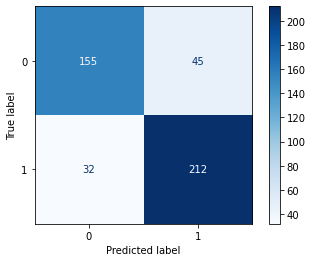

In [82]:
from sklearn.metrics import plot_confusion_matrix


plot_confusion_matrix(log_model,X_test,y_test,cmap=plt.cm.Blues);

In [83]:
from sklearn.metrics import classification_report

y_pred=log_model.predict(X_test)
print(classification_report(y_test,y_pred,target_names=['No Epileptic', 'Epileptic'],digits=4))

              precision    recall  f1-score   support

No Epileptic     0.8289    0.7750    0.8010       200
   Epileptic     0.8249    0.8689    0.8463       244

    accuracy                         0.8266       444
   macro avg     0.8269    0.8219    0.8237       444
weighted avg     0.8267    0.8266    0.8259       444



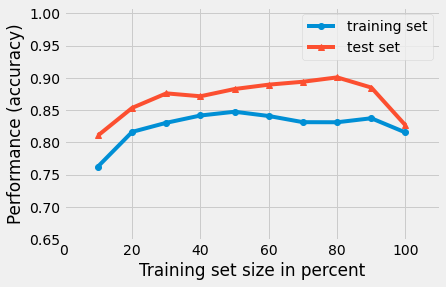

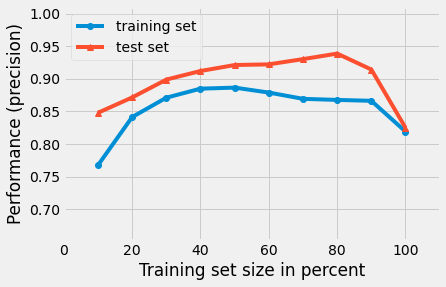

In [85]:
from mlxtend.plotting import plot_learning_curves

learning_curve_scoring = ['accuracy', 'precision']


#print(color.BOLD+color.UNDERLINE+classifier_names[1]+color.END)
for scoring_method in learning_curve_scoring:
  plot_learning_curves(X_train, y_train, X_test, y_test, log_model, 
                       train_marker='o', test_marker='^', 
                       scoring=scoring_method, print_model =False)
  if scoring_method in ['accuracy', 'precision']:
      plt.ylim(top=1.01)
  plt.show()

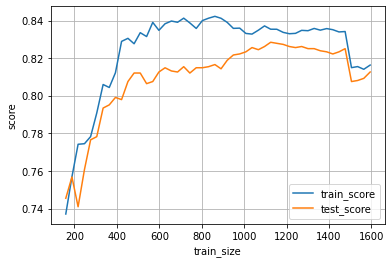

In [87]:
from sklearn.model_selection import learning_curve
train_size, train_score, test_score = learning_curve(log_model, X_train, y_train, train_sizes=np.linspace(0.1,1,50), cv=10, random_state=3 )
plt.plot(train_size, train_score.mean(axis=1), train_size, test_score.mean(axis=1))
plt.legend(('train_score', 'test_score'))
plt.xlabel('train_size')
plt.ylabel('score')
plt.grid(True)
plt.show()

## 2) RandomForestClassifier

In [156]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV


# Create param grid.
param_grid = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}

CV_rfc = GridSearchCV(estimator=RandomForestClassifier(), param_grid=param_grid, cv= 5)
CV_rfc.fit(X_train, y_train)

CV_rfc.best_params_

{'criterion': 'gini',
 'max_depth': 7,
 'max_features': 'auto',
 'n_estimators': 500}

In [71]:
from sklearn.ensemble import RandomForestClassifier

random_model=RandomForestClassifier(n_estimators= 500, criterion='gini',
                                    max_depth=7,max_features= 'auto' ,
                                    random_state=9)
random_model.fit(X_train,y_train)

print(color.BOLD+'Train score : '+color.END ,random_model.score(X_train,y_train))
print(color.BOLD+'Test score : '+color.END ,random_model.score(X_test,y_test))

Train score :  0.9232505643340858
Test score :  0.9121621621621622


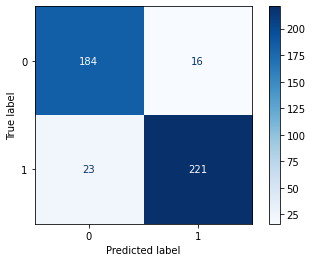

In [26]:
from sklearn.metrics import plot_confusion_matrix


plot_confusion_matrix(random_model,X_test,y_test,cmap=plt.cm.Blues);

In [27]:
from sklearn.metrics import classification_report

y_pred=random_model.predict(X_test)
print(classification_report(y_test,y_pred,target_names=['No Epileptic', 'Epileptic'],digits=4))

              precision    recall  f1-score   support

No Epileptic     0.8889    0.9200    0.9042       200
   Epileptic     0.9325    0.9057    0.9189       244

    accuracy                         0.9122       444
   macro avg     0.9107    0.9129    0.9115       444
weighted avg     0.9128    0.9122    0.9123       444



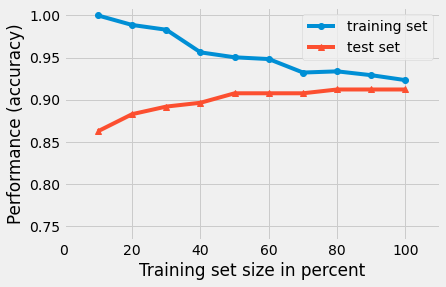

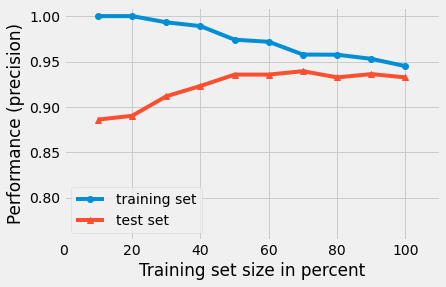

In [28]:
from mlxtend.plotting import plot_learning_curves

learning_curve_scoring = ['accuracy', 'precision']


#print(color.BOLD+color.UNDERLINE+classifier_names[1]+color.END)
for scoring_method in learning_curve_scoring:
  plot_learning_curves(X_train, y_train, X_test, y_test, random_model, 
                       train_marker='o', test_marker='^', 
                       scoring=scoring_method, print_model =False)
  if scoring_method in ['accuracy', 'precision']:
      plt.ylim(top=1.01)
  plt.show()

In [ ]:
from sklearn.model_selection import learning_curve
train_size, train_score, test_score = learning_curve(random_model, X_train, y_train, train_sizes=np.linspace(0.1,1,50), cv=10, random_state=3 )
plt.plot(train_size, train_score.mean(axis=1), train_size, test_score.mean(axis=1))
plt.legend(('train_score', 'test_score'))
plt.xlabel('train_size')
plt.ylabel('score')
plt.grid(True)
plt.show()

## 3) XGBClassifier

In [ ]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

estimator = XGBClassifier()

param_grid = {
    'n_estimators': [400, 700, 1000],
    'colsample_bytree': [0.7, 0.8],
    'max_depth': [15,20,25],
    'reg_alpha': [1.1, 1.2, 1.3],
    'reg_lambda': [1.1, 1.2, 1.3],
    'subsample': [0.7, 0.8, 0.9],
    'learning_rate': [0.1, 0.01, 0.05]
}

xgb_grid =GridSearchCV(
        estimator,
        param_grid=param_grid, 
        cv=5, 
        n_jobs=-1, 
        
        verbose=2)

xgb_grid.fit(X_train,y_train)
xgb_grid.best_params_

Fitting 5 folds for each of 1458 candidates, totalling 7290 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  7.6min
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed: 23.7min
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed: 32.9min
[Parallel(n_jobs=-1)]: Done 1005 tasks      | elapsed: 45.4min


In [70]:
from xgboost import XGBClassifier

xgb_model=XGBClassifier(max_depth=5,n_estimators=35,learning_rate=0.1)

eval_set = [(X_test, y_test)]

xgb_model.fit(X_train,y_train,early_stopping_rounds=50, eval_metric=["error"],
              eval_set=eval_set, verbose=True)

print(color.BOLD+'Train score'+color.END,xgb_model.score(X_train,y_train))
print(color.BOLD+'Test score'+color.END,xgb_model.score(X_test,y_test))

[0]	validation_0-error:0.13514
[1]	validation_0-error:0.13063
[2]	validation_0-error:0.12838
[3]	validation_0-error:0.12162
[4]	validation_0-error:0.11712
[5]	validation_0-error:0.11486
[6]	validation_0-error:0.11261
[7]	validation_0-error:0.11712
[8]	validation_0-error:0.11937
[9]	validation_0-error:0.11486


C:\Users\User\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10]	validation_0-error:0.11486
[11]	validation_0-error:0.11261
[12]	validation_0-error:0.11712
[13]	validation_0-error:0.11712
[14]	validation_0-error:0.11712
[15]	validation_0-error:0.11261
[16]	validation_0-error:0.11486
[17]	validation_0-error:0.11036
[18]	validation_0-error:0.10360
[19]	validation_0-error:0.10135
[20]	validation_0-error:0.09910
[21]	validation_0-error:0.09910
[22]	validation_0-error:0.09685
[23]	validation_0-error:0.09910
[24]	validation_0-error:0.09685
[25]	validation_0-error:0.09685
[26]	validation_0-error:0.09910
[27]	validation_0-error:0.09685
[28]	validation_0-error:0.09910
[29]	validation_0-error:0.09459
[30]	validation_0-error:0.09234
[31]	validation_0-error:0.09234
[32]	validation_0-error:0.09009
[33]	validation_0-error:0.09234
[34]	validation_0-error:0.09234
Train score 0.9294582392776524
Test score 0.9099099099099099


C:\Users\User\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


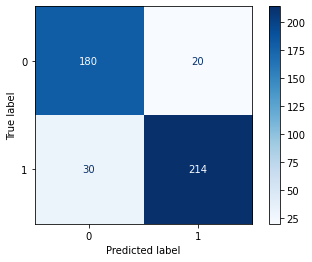

In [48]:
from sklearn.metrics import plot_confusion_matrix


plot_confusion_matrix(xgb_model,X_test,y_test,cmap=plt.cm.Blues);

In [51]:
from sklearn.metrics import classification_report

y_pred=xgb_model.predict(X_test)
print(classification_report(y_test,y_pred,target_names=['No Epileptic', 'Epileptic'],digits=4))

              precision    recall  f1-score   support

No Epileptic     0.8846    0.9200    0.9020       200
   Epileptic     0.9322    0.9016    0.9167       244

    accuracy                         0.9099       444
   macro avg     0.9084    0.9108    0.9093       444
weighted avg     0.9108    0.9099    0.9100       444



[12:49:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:49:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:49:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:49:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

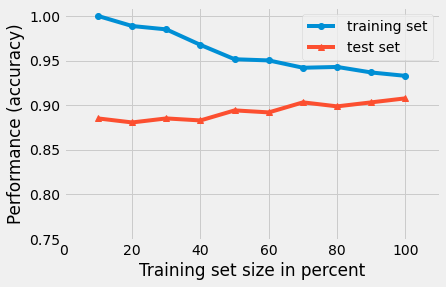

C:\Users\User\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\User\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[12:49:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:49:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:49:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:49:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

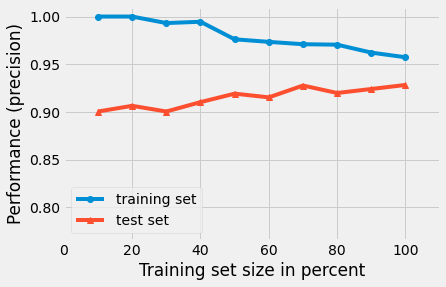

In [52]:
from mlxtend.plotting import plot_learning_curves

learning_curve_scoring = ['accuracy', 'precision']


#print(color.BOLD+color.UNDERLINE+classifier_names[1]+color.END)
for scoring_method in learning_curve_scoring:
  plot_learning_curves(X_train, y_train, X_test, y_test, xgb_model, 
                       train_marker='o', test_marker='^', 
                       scoring=scoring_method, print_model =False)
  if scoring_method in ['accuracy', 'precision']:
      plt.ylim(top=1.01)
  plt.show()

## 4) Support Vector Machine (SVM)

In [ ]:
from sklearn import svm
from sklearn.model_selection import GridSearchCV

# Set the parameters by cross-validation
param_grid = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf','linear', 'poly', 'sigmoid']} 
  
grid = GridSearchCV(svm.SVC(), param_grid, refit = True, verbose = 3)
  
# fitting the model for grid search
grid.fit(X_train, y_train)
grid.best_params_

In [66]:
from sklearn import svm

svm_model=svm.SVC(C=10000,kernel='rbf',gamma=0.1)
svm_model.fit(X_train,y_train)

print(color.BOLD+'Train score'+color.END,svm_model.score(X_train,y_train))
print(color.BOLD+'Test score'+color.END,svm_model.score(X_test,y_test))

Train score 0.8910835214446953
Test score 0.8986486486486487


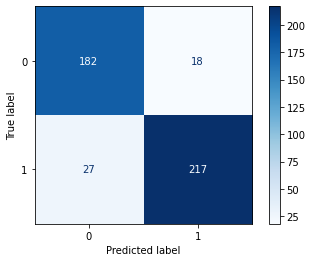

In [67]:
from sklearn.metrics import plot_confusion_matrix


plot_confusion_matrix(svm_model,X_test,y_test,cmap=plt.cm.Blues);

In [68]:
from sklearn.metrics import classification_report

y_pred=svm_model.predict(X_test)
print(classification_report(y_test,y_pred,target_names=['No Epileptic', 'Epileptic'],digits=4))

              precision    recall  f1-score   support

No Epileptic     0.8708    0.9100    0.8900       200
   Epileptic     0.9234    0.8893    0.9061       244

    accuracy                         0.8986       444
   macro avg     0.8971    0.8997    0.8980       444
weighted avg     0.8997    0.8986    0.8988       444



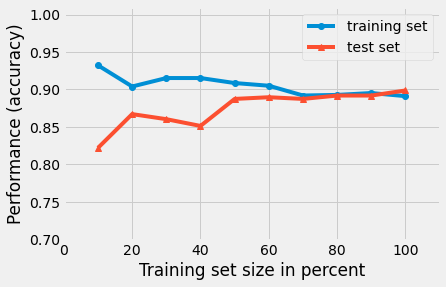

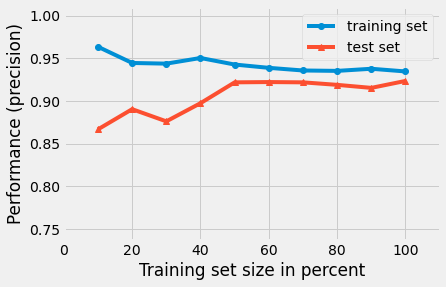

In [69]:
from mlxtend.plotting import plot_learning_curves

learning_curve_scoring = ['accuracy', 'precision']


#print(color.BOLD+color.UNDERLINE+classifier_names[1]+color.END)
for scoring_method in learning_curve_scoring:
  plot_learning_curves(X_train, y_train, X_test, y_test, svm_model, 
                       train_marker='o', test_marker='^', 
                       scoring=scoring_method, print_model =False)
  if scoring_method in ['accuracy', 'precision']:
      plt.ylim(top=1.01)
  plt.show()

# Summary

In [90]:
l=['LogisticRegression','RandomForestClassifier',' XGBClassifier','SVM']
train_score = pd.Series([0.8154,0.9232,0.9294,0.8910], index=l)
test_score = pd.Series([0.8265,0.9121,0.9099,0.8986], index=l)
f1_score_epileptic = pd.Series([0.8010,0.9042,0.9020,0.8900], index=l)
f1_score_not_epileptic = pd.Series([0.8463,0.9189,0.9167,0.9061], index=l)
accuary = pd.Series([0.8266,0.9122,0.9099,0.8986], index=l)


In [91]:
stat = pd.DataFrame({'train_score': train_score,
                    'test_score ' : test_score,
                    'f1_score_epileptic': f1_score_epileptic,
                    'f1_score_not_epileptic': f1_score_not_epileptic ,
                   'accuary': accuary}
                   )
stat

,train_score,test_score,f1_score_epileptic,f1_score_not_epileptic,accuary
LogisticRegression,0.8154,0.8265,0.8010,0.8463,0.8266
RandomForestClassifier,0.9232,0.9121,0.9042,0.9189,0.9122
XGBClassifier,0.9294,0.9099,0.9020,0.9167,0.9099
SVM,0.8910,0.8986,0.8900,0.9061,0.8986
